# COGS 108 - Final Project 

# Overview

We believe that the location and industry of startups are the main contributors to the overall success of a startup compared to other factors because location is often correlated with different amount of business opportunities, and industry often dictates the profit margins and market. Therefore, we analyized funding amount, longetivity, and lifespan of start-up companies in different locations and industries. With the result, we could conclude which cities and industries are the best for a new start-up company.

# Names

- Hansae Lee: A14062618
- Eun Hye (Grace) Oh: A12960475
- Iris Nayki: A14520625
- Matthew Davis: A13050499
- Tianxing Liu: A14800461
- Yuting Xu: A13361405

# Research Question

*Which cities and industries are the best place and target for start-up companies in terms of funding amount, longetivity, and lifespan of them?*

## Background and Prior Work

- Given the continual rise of startups in various locations and their diverse industries, there is rich data regarding their funds and overall performance in receiving investments and interest in public and business sector. We are curious as to what factors contribute most to investments in startups, such as their specific industry and location and how much and in what ways they may contribute to their funding and seen potential market value. We hope to track trends and commonalities among a great number and wide range of startups to answer our questions and approach our hypothesis. 
- A similar project on this topic is Startup World where they used Crunchbase data, Loopnet commercial real estate prices, and coworking locations in order to find “the most lucrative cities for startups and coworking places today”. After extensive research and analysis, Diana Kontsevaia concluded that the best place for startups to work is Milwaukee, Wisconsin since it has a high average funding: https://data.world/dkonts/startup-development-potential


# Hypothesis


*With the analyzed data about the start-up companies around this country, we would be able to find the best city and industriy for start-up compnies. We expect Silicon Valley and Apps are the best location and industry for start-up companies as they are already treated as the best place and topic to be a successful company today.*

# Dataset(s)

*In order to answer our research question, we found Crunchbase (https://www.crunchbase.com), a platform for finding company data. They have datasets for companies and investors, built to track startups and thier finances. Crunchbases data is private and requires a subscription to access. We contacted Crunchbase as a team to ask for access to thier datasets for the purposes of this project. They kindly agreed to help our project and granted us an API key to download thier data set free of charge. We included a copy of the downloaded dataset in our github, but we ask that it is not redistributed to respect the access given by Crunchbase.* 

- Dataset Name: Crunchbase Daily Export
- Link to the dataset: 
    - https://github.com/mdavis917/COGS108_Repo
- Additional links:
    - https://data.crunchbase.com/docs
    - https://www.crunchbase.com/
    
- Variables/information included: 
Company name, company domain, country code, state code, region, city, status, short description, industry categories, number of employees, number of funding rounds, total funding, founding date, first funding date, last funding date, closed date, company email address, company phone number, company specific Crunchbase URL, company Twitter URL, company Facebook URL, and UUID.
- Number of observations:
235,031 start-up companies.


# Setup

First, we will import various libraries and a raw dataset.

In [1]:
%matplotlib inline

# libraries we will be using to analyze our data
import pandas as pd
import numpy as np
import operator
import matplotlib.pyplot as plt

# import the data set we will be using
df = pd.read_csv('crunchbase_export.csv' , encoding='latin-1', low_memory = False)

This is a function to be used later. It converts input string value into an integer value.

In [2]:
# a function to convert incoming string to an integer value with no commas
def convert_fund(str_in):
    
    # remove commas
    str_in = str_in.strip()
    str_in = str_in.replace(',', '')
    str_in = str_in.strip()
    
    # convert it to an integer and return it
    return int(str_in)

# Data Cleaning

We will drop any unnecessary information in the dataframe here.

In [3]:
# drop any unnecessary columns
df.drop(['company_name','region','domain','short_description', 'category_list', ' employee_count ','email','phone','cb_url', 'twitter_url', 'facebook_url' , 'uuid'], axis=1, inplace=True)

# keep only domestic companies and drop the column
df = df[df['country_code'] == 'USA']
df.drop(['country_code'], axis=1, inplace=True)

# Data Analysis & Results

In order to see how Location and Industry might interact first we want to analyze each of those aspects seperatly.

## Most Successful By Location

There are many different cities where startups are created in the United States. As such we would like to make the data more readable by limiting it to a subset of the largest 20 cities
- We can either import a population data set (like the homework) or just sort by the amount of companies in each city

In addition, there are multiple criteria for success that we would like to explore. 
- Total amount of funding is a valuble metric for success in terms of raising funds. However, a startup can raise tons of capital and still burn through it all. 
- Success can also be measured by ability to be aquired, or launch as an IPO vs being closed, however a company can be aquired for pennies compared to how much it costs to fund. 
- Lastly we could use the longevity of a company as a metric of success. However a company could last with negative profits for a long time before finally closing
    
- We will explore all of these different metrics to see how they change the overall story of how location impacts these factors.

### Sorting and Cleaning Data for Location

Because of the sheer number of cities in close proximity to each other, cities that are considered to be Silicon Valley are will be renamed to silicon valley in order to be grouped together

In [4]:
sil_valley = ["Palo Alto", "Santa Clara", "San Jose", "Mountain View", "Sunnyvale", "San Francisco", "San Mateo", "Redwood City"]
df.loc[df["city"].isin(sil_valley), "city"] = "Silicon Valley"

In [5]:
# make a copy of the original dataframe that will be used only for location
df_loc = df.copy()

### Total Companies by City

In [6]:
def total_comp_by_val(df, value_to_sort, title_v):

    # extract number of companies per city
    df_val = pd.value_counts(df[value_to_sort]).to_frame()

    # extract top 20 cities
    df_val = df_val[:20]

    # visualize the data
    graph = df_val.plot.bar(title=title_v,legend=False)
    graph.set_xlabel(value_to_sort)
    graph.set_ylabel('Number of Companies')

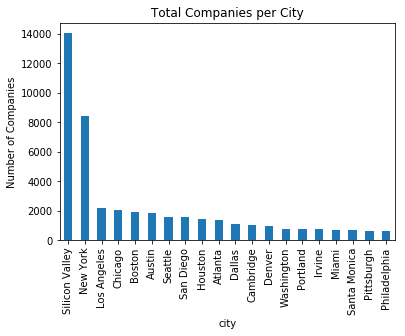

In [7]:
total_comp_by_val(df_loc, 'city', 'Total Companies per City')

As we expected, New York and Silicon Valley have the most start-up companies in US. Every other cities have fairly similiar number of start-up companies.

### Total Amount Funded By City

In [8]:
def total_amt_funded(df, val_to_sort, title_v):
    df_copy = df.copy()
    # replace NaN with '0'
    df_copy.fillna('0', inplace=True)

    # convert the values
    df_copy[' funding_total_usd '] = df_copy[' funding_total_usd '].apply(convert_fund)

    # dataframe to count total amount funded per industry
    df_total_fund = pd.value_counts(df_copy[val_to_sort]).to_frame()
    df_total_fund = df_total_fund[:20]

    # drop the number of companies column and add total funding column
    df_total_fund.drop([val_to_sort], axis=1, inplace=True)
    fund = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    df_total_fund['total_fund'] = fund

    # drop any row with no funding
    df_fund = df_copy.copy()
    df_fund = df_fund[df_fund[' funding_total_usd '] > 0]

    # find total amounted funded by industry
    for index, row in df_fund.iterrows():

        # if there was funding
        if df_total_fund.index.contains(row[val_to_sort]):
            df_total_fund.loc[row[val_to_sort], 'total_fund'] += row[' funding_total_usd ']

    # sort the value
    df_total_fund.sort_values(by=['total_fund'], inplace=True, ascending=False)

    # visualize the data
    df_total_fund = df_total_fund.floordiv(1000000)
    graph = df_total_fund.plot.bar(title=title_v,legend=False)
    graph.set_xlabel(val_to_sort)
    graph.set_ylabel('Total Funding in Million USD')
    
    return df_total_fund

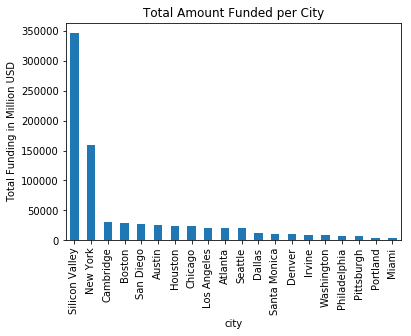

In [9]:
df_tot_fund = total_amt_funded(df_loc, "city", "Total Amount Funded per City")

Without a doubt, New York and Silicon Valley have the most total amount of funding out all the cities as we could see they have the most number of companies in the previous graph.

### Average Capital Raised By City

In [10]:
def avg_fund_bar_and_box(df, df_funding, val_to_sort, title_v):
    
    ########## bar graph ##########
    
    df_fund = df.copy()

    # replace NaN with '0'
    df_fund.fillna('0', inplace=True)

    # convert the values
    df_fund[' funding_total_usd '] = df_fund[' funding_total_usd '].apply(convert_fund)
    
    # drop any row with no funding
    df_fund = df_fund[df_fund[' funding_total_usd '] > 0]
    
    # dataframe to count average amount funded per industry
    df_loc_avg_fund = df_funding.copy()

    # add funding rounds column
    funding_rounds = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    df_loc_avg_fund['funding_rounds'] = funding_rounds

    # find total amounted funded by industry
    for index, row in df_fund.iterrows():

        # if there was funding
        if df_loc_avg_fund.index.contains(row[val_to_sort]):
            df_loc_avg_fund.loc[row[val_to_sort], 'funding_rounds'] += row['funding_rounds']

    # find the average funding and drop unnecessary columns
    df_loc_avg_fund['average_fund'] = df_loc_avg_fund['total_fund'] / df_loc_avg_fund['funding_rounds']
    df_loc_avg_fund.drop(['total_fund','funding_rounds'],axis=1,inplace=True)

    # sort the value
    df_loc_avg_fund.sort_values(by=['average_fund'], inplace=True, ascending=False)

    # visualize the data
    graph = df_loc_avg_fund.plot.bar(title=title_v + " (Mean)",legend=False)
    graph.set_xlabel(val_to_sort)
    graph.set_ylabel('Average Funding in Million USD')
        
    ########## boxplot graph ##########
    
    # copy the original dataframe
    df_loc_avg_fund = df_fund.copy()
    
    # find the average funding for each company
    df_loc_avg_fund['average_funding'] = df_loc_avg_fund[' funding_total_usd '] / df_loc_avg_fund['funding_rounds']

    # drop unneccessary columns
    df_loc_avg_fund.drop(['funding_rounds',' funding_total_usd '],axis=1,inplace=True)

    # construct a dictionary with the top 20 cities
    lst_top = pd.value_counts(df[val_to_sort]).to_frame()[:20].index.tolist()
    lst_top = dict.fromkeys(lst_top,0)
    for key, value in lst_top.items():
        lst_top[key] = list() 
        
    # fill the each list with average funding of each company in its city
    for index, row in df_loc_avg_fund.iterrows():
        if row[val_to_sort] in lst_top.keys():
            try:
                lst_top[row[val_to_sort]].append(int(row['average_funding']))
            except:
                print(row[val_to_sort], row['average_funding'])

    # find maximum length of the lists
    maxLength = 0
    for val, funding in lst_top.items():
        if maxLength < len(funding):
            maxLength = len(funding)

    # make the lists to have same length and fill it with NaN
    for val, funding in lst_top.items():
        for i in range(maxLength - len(funding)):
            funding.append(np.NaN)

    # build dataframe from the dictionary
    df_loc_boxplot = pd.DataFrame(lst_top)

    # sort it by median value
    med_loc = df_loc_boxplot.median()
    med_loc.sort_values(ascending=False, inplace=True)
    df_loc_boxplot = df_loc_boxplot[med_loc.index]

    # visualize the data
    df_loc_boxplot = df_loc_boxplot.floordiv(1000000)
    graph = df_loc_boxplot.plot.box(title=title_v + " (Boxplot)",legend=False,rot=90,showfliers=False)
    graph.set_xlabel(val_to_sort)
    graph.set_ylabel('Average Funding in Million USD')

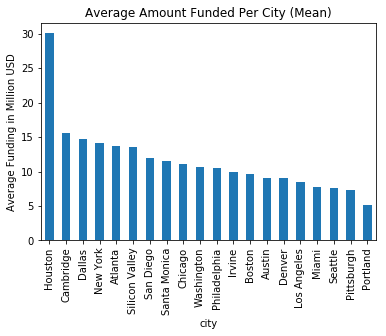

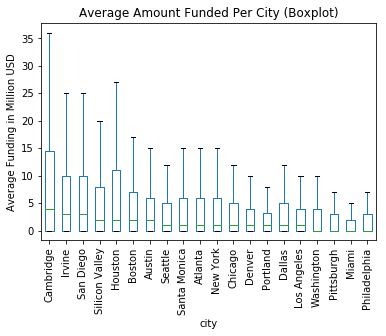

In [11]:
avg_fund_bar_and_box(df_loc, df_tot_fund, "city", "Average Amount Funded Per City")

Interestingly, Houston has the outstanding average funding out of all the cities, while New York and Silicon Valley have about the same amount to the other cities.

We used a boxplot here to exclude outliers. This graph finally shows us which city really gets the highest average funding. New York and Silicon Valley are ranked relatively lower than previous graphs, meaning their high total funding amounts were sololy because of the massive number of companies over the other cities. Houston also is not in the top three in this graph even with the outstanding result in the bar graph. It indicates that Houston has a few companies that received huge amount of funding, which brought its average amount higher than the others. In this graph, we can conclude that Cambridge is the best city for start-up companies to get most funding, rather than Silicon Valley, New York, or Houston.

### Ratio of Closed to (Aquired & IPO)

In [12]:
def rat_closed_to_aquired(df, value_to_sort, title_v):
    df_rat = df.copy()
    list_val = dict(pd.value_counts(df_rat[value_to_sort]))
    vals = dict()
    df_rat = df.reset_index(drop=True)

    for (x,y) in list_val.items():
        vals[x] = [0,0]

    for i in range(len(df_rat)):
        val = df_rat.loc[i][value_to_sort]
        stat = df_rat.loc[i]['status']

        if stat=='closed':
            vals[val][0]+=1
        elif stat=='ipo'or stat=='acquired':
            vals[val][1]+=1
    
    count=0
    newdict = dict()
    for (x,y) in list_val.items():
        if count < 20:
            sum = vals[x][0]+vals[x][1]
            newdict[x] = [vals[x][0] / sum , vals[x][1] / sum]
        count+=1

    newdf2 = pd.DataFrame.from_dict(newdict,orient='index')
    newdf2 = newdf2.sort_values(by=[0],ascending=False)
    newdf2.columns = ['closed', 'IPO & acquired']
    ax = newdf2.plot(kind='bar',stacked=True)
    ax.set_title(title_v)
    ax.set_xlabel(value_to_sort)
    ax.set_ylabel("ratio")
    for rec1, label1 in zip(ax.patches,newdf2['closed'].round(1).astype(str)):
        height1 = rec1.get_height()
        ax.text(rec1.get_x() + rec1.get_width() , height1 + .05, label1,
               ha = 'center', va='bottom')
    plt.legend(loc='upper right')

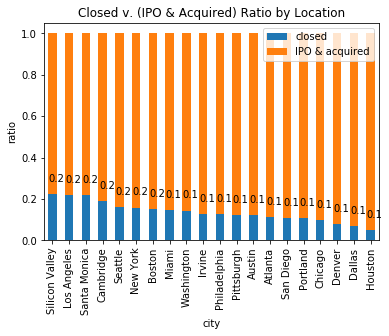

In [13]:
rat_closed_to_aquired(df_loc, "city", "Closed v. (IPO & Acquired) Ratio by Location")

### Longevity between first operation and last operation

We use a function longevity to calculate the length of total time that each startup exits. If there is no data about when the company is founded on, drop this row, because we cannot calculate the longevity. After that, if the row is missing "closed on" information, by default, this company is still operating. In this case, we will calculate the longevity based on the current year (2019).

To show the relationship between logevity and location, we calculate the average longevity of each city and rank the cities by the average longevity from high to low. In this project, we focus on the top 20 cities with highest longeivity and show the bar plot in the following.

In [14]:
def longevity(row):
    if(pd.isnull(row['closed_on'])):
        return (2019 - int(row['founded_on'][0:4]))
    else:
        return (int(row['closed_on'][0:4]) - int(row['founded_on'][0:4]))

In [15]:
def long_btwn_fst_and_lst(df, value_to_check, title_v = ""):
    df_temp = df.copy()
    df_temp.head()
    df_temp.dropna(subset=['founded_on'], inplace=True)
    df_temp['longevity'] = df_temp.apply(lambda row: longevity(row), axis=1)
    #Data for industry
    df_val = df[value_to_check].value_counts().index[:20]
    df_avgL = np.zeros(len(df_val))
    for i in range(len(df_val)):
        df_avgL[i] = df_temp.loc[df[value_to_check] == df_val[i]]['longevity'].mean()

    #Draw the bar plot
    df_longevity = pd.DataFrame({value_to_check:df_val, 'average longevity':df_avgL})
    df_longevity = df_longevity.sort_values(by = ['average longevity'],ascending = False)
    graph = df_longevity.plot.bar(x=value_to_check, y='average longevity', color = (0.2, 0.4, 0.6, 0.8),legend=False, title = title_v)
    graph.set_xlabel(value_to_check)
    graph.set_ylabel('average longeivity (yr)')

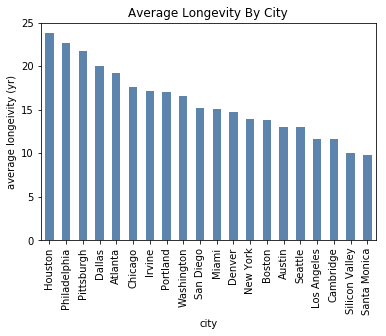

In [16]:
long_btwn_fst_and_lst(df_loc, 'city', title_v = "Average Longevity By City")

From the graph above, we can see that Houston has the highest average longeivity among all cities in the US.

## Most Successful By Industry

There are many industires that these startups are involved in. Some very unique topics and some very broad that don't say alot about what the company does. As such we need to find some of the most popular industies and see how each company fits into these. For each company, the data shows a list of categories the company is involved in. To clean this data we will create a bucket of the most popular 20 industies where each company that reports that industry will be in it. (Note some companies can be in multiple buckets) This list of 20 industries will have some broad terms like apps removed and replaced with the next highest topic occurance. This choice of non-specificity is done manually. And we have a description as to why the choice was removed.

We will then analyze this data by the same criteria of success as done in location

### Sorting and Cleaning Data By Industry 

First we sort by all of the industries listed for every company. We drop any that don't have an industry reported, rather than mark as other, because they might still belong in one of these other lists.

In [17]:
# copy the original dataframe
df_ind = df.copy()

# drop rows with no industry category and irrelevant columns
df_ind.dropna(subset=['category_group_list'], inplace=True)

Here, we are going to use a function written by James Allen from https://gist.github.com/jlln.

This function efficiently split Pandas Dataframe cells containing lists into multiple rows, duplicating the other column's values.

In [18]:
# CODE FRAGMENT USED FROM https://gist.github.com/jlln/338b4b0b55bd6984f883
def splitDataFrameList(df,target_column,separator):
    '''
    df = dataframe to split,
    target_column = the column containing the values to split
    separator = the symbol used to perform the split
    returns: a dataframe with each entry for the target column separated, with each element moved into a new row. 
    The values in the other columns are duplicated across the newly divided rows.
    '''
    def splitListToRows(row,row_accumulator,target_column,separator):
        split_row = row[target_column].split(separator)
        for s in split_row:
            new_row = row.to_dict()
            new_row[target_column] = s
            row_accumulator.append(new_row)
    new_rows = []
    df.apply(splitListToRows,axis=1,args = (new_rows,target_column,separator))
    new_df = pd.DataFrame(new_rows)
    return new_df

In [19]:
# split the companies with multiple industries into separate rows
df_ind_split = splitDataFrameList(df_ind,'category_group_list','|')

# rename the column
df_ind_split.rename(index=str, columns={'category_group_list':'industry'}, inplace=True)

Now some of these topics are rather broad. I.E. (Software, Hardware, Internet Services, Information Technology, and Science and Engineering) So we will ignore these categories. Otherwise for each category a company has listed we will create a new row with just the one category

In [20]:
bad_industry = ['software','internet services','information technology','hardware','science and engineering']
for ind in bad_industry:
    df_ind_split.drop(df_ind_split.loc[df_ind_split['industry'] == ind].index, inplace=True)

### Total Companies by Industry

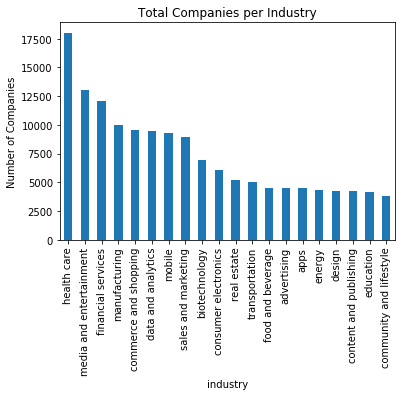

In [21]:
total_comp_by_val(df_ind_split, 'industry', 'Total Companies per Industry')

Out of many industries, the most popular industry for start-up companies was Health Care, followed by Media & Entertainment, and Finaicial Servies.

### Total Amount Funded by Industry

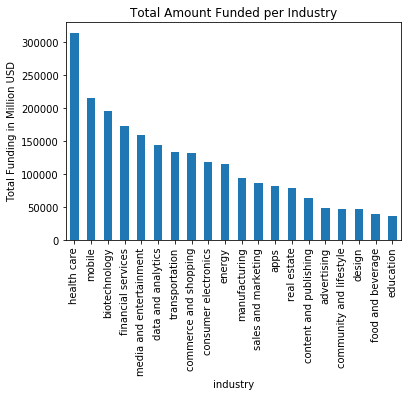

In [22]:
df_tot_fund = total_amt_funded(df_ind_split, "industry", "Total Amount Funded per Industry")

As we could predict from the previous graph, Health Care has the biggest total funding out of all. However, Media & Entertainment and Financial Services got less total funding than mobile and Biotechnology depite their number of companies.

### Average Capital Raised By Industry

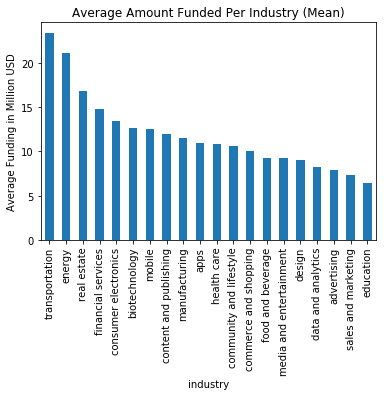

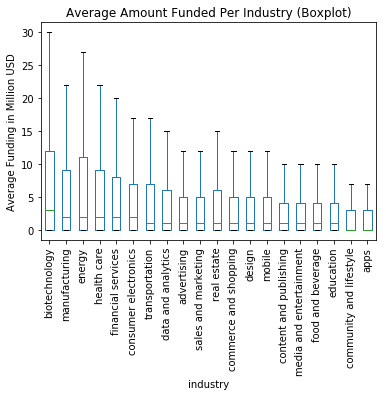

In [23]:
avg_fund_bar_and_box(df_ind_split, df_tot_fund, "industry", "Average Amount Funded Per Industry")

Interestingly, Transportation has the highest average funding out of all the other industries, while Health Care is ranked far behind. Also, Energy and Real Estate became second and third places, making a huge step from the lower half in the previous graphs.

Here we discovered that Transportation had a few company with exceptionally large funding affecting the average funding in the industry. After removing all the outliers, we could conclude that Biotechnology is the real industry with the highest average funding amount out of all.

### Ratio of Closed to (Aquired & IPO)

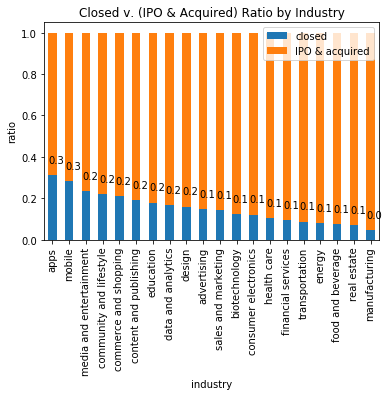

In [24]:
rat_closed_to_aquired(df_ind_split, 'industry', "Closed v. (IPO & Acquired) Ratio by Industry")

### Analysis for Closed v. (Acquired & IPO): 

We decided to analyze the ratio of closed v. (acquired & IPO) companies categorized by industries and locations because it gives us a visual understanding of the success (defined here by a company being acquired or obtaining IPO) and failure (defined here by a company being closed).

To generate the graphs, we started by constructing two dictionaries in the format of 

1. key: industry, value: [number of closed companies under the industry, number of acquired & IPO companies under the industry]
2. key: city, value: [number of closed companies in the city, number of acquired & IPO companies in the city]

from the dataframe that we cleaned (removed vague industries). We traversed through each row in the dataframe and used each row's industry/city to modify the dictionary values. For example, if a company is under "Apps" for industry and "Palo Alto" for city, and "closed" for its status, then we simply increment the first element of the dictionary entry with the key value "Apps" and the key value "Palo Alto".

After obtaining the dictionaries, we constructed two new dataframes for generating the graphs. We only included the industries and cities with the top 20 most number of companies to avoid extreme data. The dataframes have the following columns

1. index | industry | ratio of closed companies | ratio of acquired & IPO companies

2. index | city | ratio of closed companies | ratio of acquired & IPO companies.

From here, we sorted the categories by the ratio of closed companies and used the plot function of pandas dataframe to generate the stacked bar charts. 



#### Industries
Top 3 with lowest closed rate: 
1. Manufacturing
2. Real estate
3. Food and beverage

Top 3 with highest closed rate:
1. Apps
2. Mobile
3. Media and entertainment


Since both Apps and Mobile industries can be categorized under technology, our finding shows that technology industry has a higher closed rate than other industries. 

#### Cities
Top 3 with lowest closed rate: 
1. Houston
2. Dallas
3. Denver

Top 3 with highest closed rate:
1. Palo Alto
2. Silicon Valley
3. Los Angeles

We can conclude that big cities in California like Silicon Valley, and Los Angeles have a higher closed rate than other cities.

We can then conclude that starting a business in technology industry and in the cities like Silicon Valley, and Los Angeles will more likely fail (more likely to close than being acquired or having IPO). In contrast, having a manufacturing business in Houston, Dallas, or Denver will more likely to succeed. Intuitively, it makes sense that cities with high living costs (like California cities) have more risks for startup companies because the comapnies would have a difficult time covering all its expenses before they make a profit. Similarly, technology businesses need to constantly obtain the most recent technical information to stay competitive, and thus makes the industry more demanding than others.

Because the graphs show no significant difference in ratio (the highest is 0.3 and the lowest is 0.1), we can also conclude that ratio of closed and (IPO & acquired) is not a strong indicator for predicting the success/failure of companies. In other words, we should use more than just the ratio of closed and acquired & IPO companies to measure the effect of industries and location on startup companies.

### Longevity between first operation and last operation

We did the same thing here to show the relationship between longevity and industry.

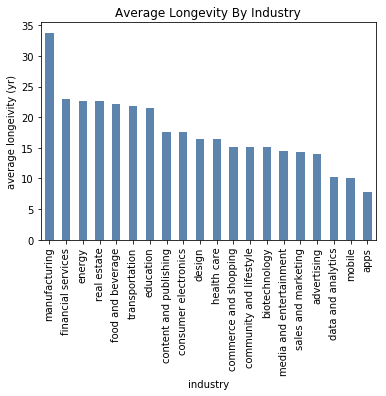

In [25]:
long_btwn_fst_and_lst(df_ind_split, "industry", "Average Longevity By Industry")

### Analysis for longevity: 

#### Industries
Top 3 with highest longevity: 
1. Manufacturing
2. Financial services
3. Energy


#### Cities
Top 3 with highest longevity: 
1. Houston
2. Dallas
3. Atlanta



## Most Successful By Industry and Location

Instead of having multiple sets of graphs for each city or industry this code section is built to take in a variable for an industry or city, and will print out subsequent graphs for industries in that city or cities for that industry respectivly. We used this section to explore different cities and industries.

In [26]:
# ONLY FILL IN THE VALUE OF EITHER CITY OR INDUSTRY

### REPLACE NONE WITH CITY HERE ###
cit_to_exp = "Houston"

### REPLACE NONE WITH INDUSTRY HERE ###

ind_to_exp = None

assert(bool(cit_to_exp) != bool(ind_to_exp))

In [27]:
def explore_city (df_ind_split, cit_to_explore):
    if (cit_to_exp == None):
        return
    df_to_exp = df_ind_split.copy()
    df_to_exp = df_to_exp[df_to_exp['city'] == cit_to_explore]
    if (len(df.index) < 50):
        print("Not Enough Data to Explore")
    else:
        total_comp_by_val(df_to_exp, 'industry', 'Total Companies per Industry in '+ cit_to_explore)
        df_tot_fund = total_amt_funded(df_to_exp, "industry", "Total Amount Funded per Industry in " + cit_to_explore)
        avg_fund_bar_and_box(df_to_exp, df_tot_fund, "industry", "Average Amount Funded Per Industry in " + cit_to_explore)
        rat_closed_to_aquired(df_to_exp, 'industry', "Closed v. (IPO & Acquired) Ratio by Industry in " + cit_to_explore)
        long_btwn_fst_and_lst(df_to_exp, "industry", "Average Longevity By Industry in " + cit_to_explore) 

In [28]:
def explore_industry (df_ind_split, ind_to_explore):
    if (ind_to_exp == None):
        return
    df_to_exp = df_ind_split.copy()
    df_to_exp = df_to_exp[df_to_exp['industry'] == ind_to_explore]
    if (len(df.index) < 50):
        print("Not Enough Data to Explore")
    else:
        total_comp_by_val(df_to_exp, 'city', 'Total Companies By City for '+ ind_to_explore)
        df_tot_fund = total_amt_funded(df_to_exp, "city", "Total Amount Funded By City for "+ ind_to_explore)
        avg_fund_bar_and_box(df_to_exp, df_tot_fund, "city", "Average Amount Funded By City for "+ ind_to_explore)
        rat_closed_to_aquired(df_to_exp, 'city', "Closed v. (IPO & Acquired) Ratio by City for "+ ind_to_explore)
        long_btwn_fst_and_lst(df_to_exp, "city", "Average Longevity By City for " + ind_to_explore)

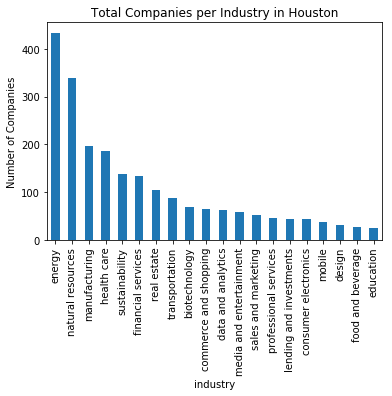

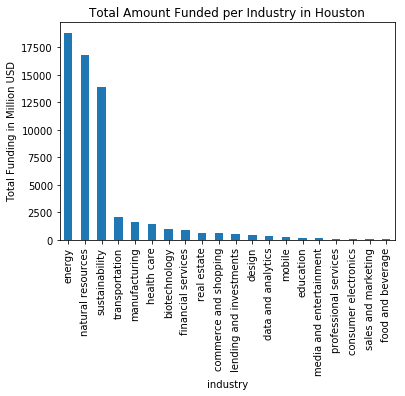

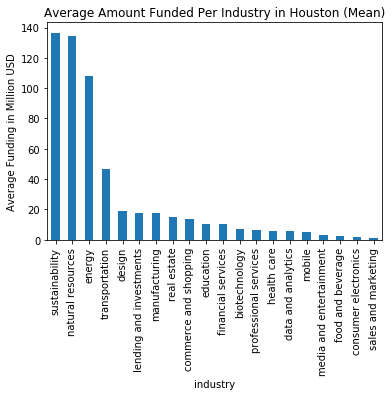

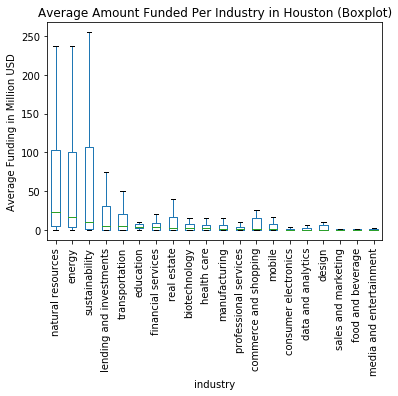

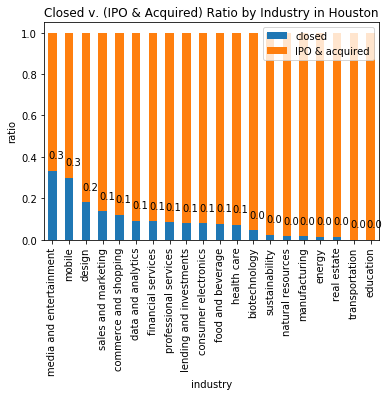

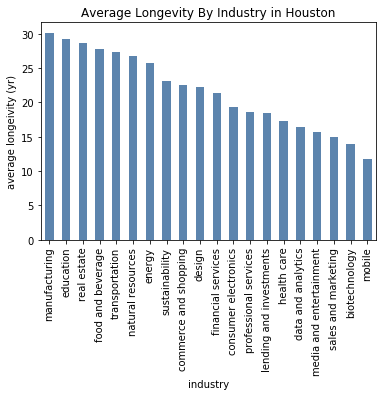

In [29]:
explore_city(df_ind_split,cit_to_exp)
explore_industry(df_ind_split,ind_to_exp)

# Ethics & Privacy

For the ethical considerations, we referred to [Deon’s Ethics Checklist](https://hub.packtpub.com/introducing-deon-a-tool-for-data-scientists-to-add-an-ethics-checklist/):

__Data Collection:__
The data we are using is from a database called Crunchbase, which provides datasets to the public. Their terms and services do not require their users to ask for any consent to use their data unless the user is underage. The dataset itself only contains quantitative values that state simple facts, such as founding dates of companies or amount of funding, for all the startups in the region, so it is free from collection/source bias. All the data are about each startup company, so there is no exposure of personally identifiable information.

__Data Storage:__
We will store our datasets in our Google drive which only our team members have access to. Any unnecessary data will be removed from the storage during the process. After submission of this project, all the remaining data in the Google drive will be deleted.

__Analysis:__
We are measuring the performance of startups based on factors such as investments, lifespan and profits. However, it’s hard to quantify the success of a startup precisely.

__Potential Harm and Benefits:__ 
Potential investors and companies can use this data to guide their business endeavours as they can make informed decisions. 
However, potential investors and companies who use our conclusion to decide whether to invest in startups or to build up a startup may in some ways be hindered by the data provided, despite the existence of other variables that may influence their success and failure rate and may cause for the economy of various locations and industries to be polarized.


# Conclusion & Discussion

*Fill in your discussion information here*